# CASO DE ESTUDIO 1 - RED NEURONAL PREDICCION DE PRECIOS DE VIVIENDAS

## 1. Carga de dataset y subida a DataFrame

In [189]:
import pandas as pd

!pip install kagglehub
import kagglehub



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Descarga directa de kaggle

In [190]:
# path_kaggle = kagglehub.dataset_download("yasserh/housing-prices-dataset", path="Housing.csv", force_download=True)

# print("Path to dataset files:", path_kaggle)

### Descarga de local

In [191]:
path_local = "house-dtset.csv"

### Carga en dataset

In [192]:
# Para path de kaggle
# df = pd.read_csv(path_kaggle)



# Para path de local
df = pd.read_csv(path_local)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


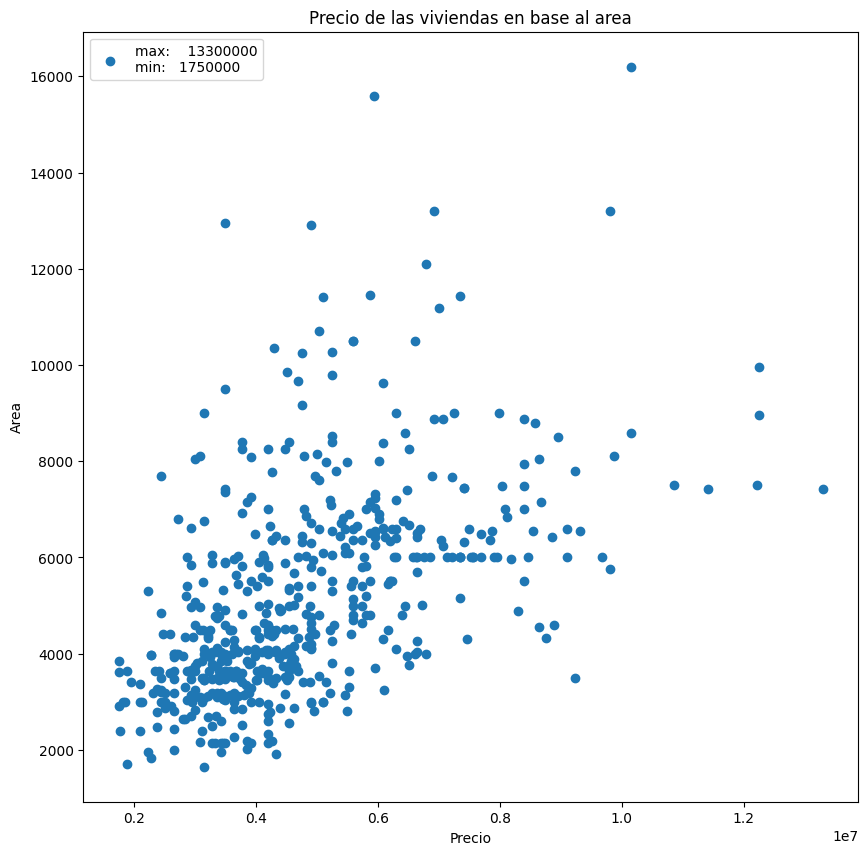

In [193]:
import matplotlib.pyplot as plt

min_price = df["price"].min()
max_price = df["price"].max()
legend_text = f"max:    {max_price}\nmin:   {min_price}"

plt.figure(figsize=(10,10))
plt.scatter(df["price"], df["area"])
plt.xlabel("Precio")
plt.ylabel("Area")
plt.legend([legend_text], loc="upper left")

plt.title("Precio de las viviendas en base al area")
plt.show()

### Visualizacion Nulos

In [194]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

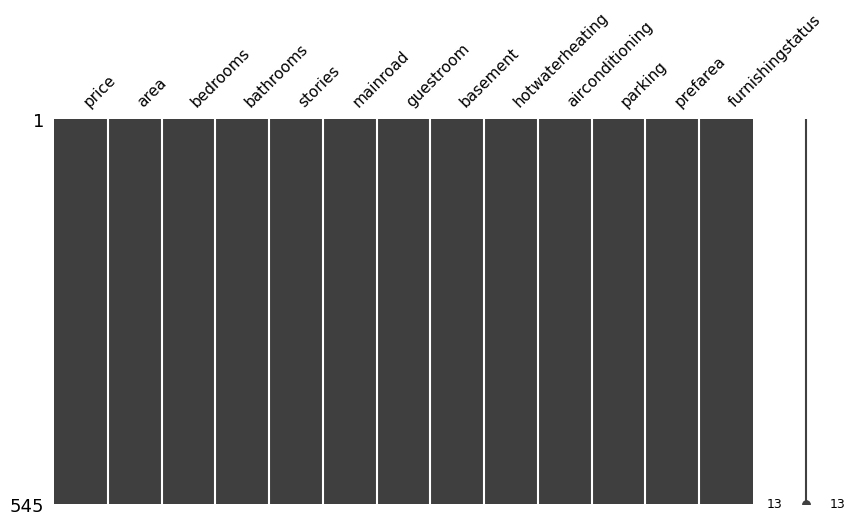

In [195]:
!pip install missingno
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(df, figsize=(10,5), fontsize=11)

### Visualizacion outliers

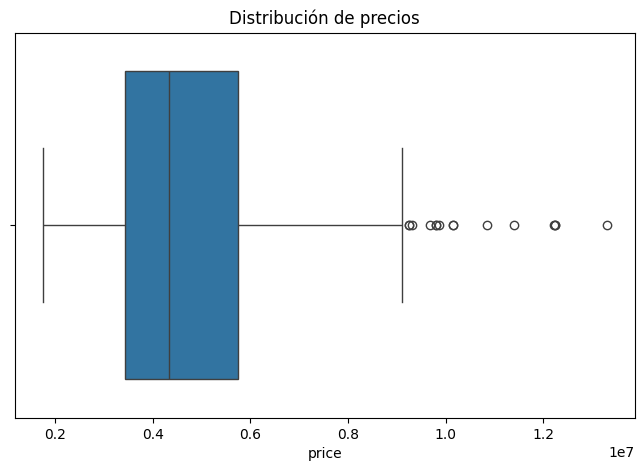

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para detectar outliers en price
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["price"])
plt.title("Distribución de precios")
plt.show()


## 2. Preprocesamiento de datos

### Limpieza de outliers

In [197]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

# Definir umbrales de outliers
lower_bound = Q1 - 1.33 * IQR
upper_bound = Q3 + 1.33 * IQR

# Filtrar datos dentro de los límites
df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]


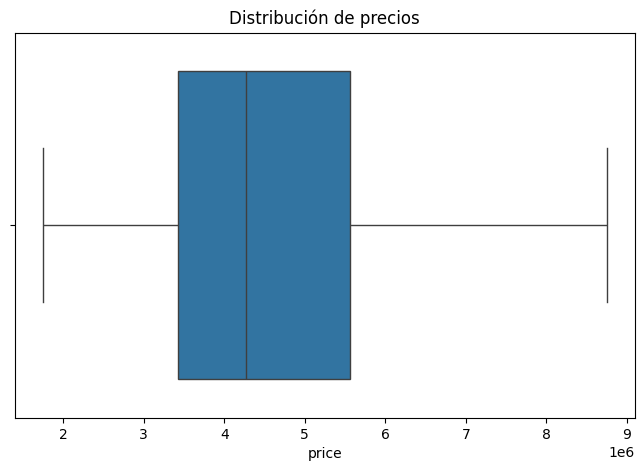

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para detectar outliers en price
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["price"])
plt.title("Distribución de precios")
plt.show()


### Codificacion de variables categoricas

In [199]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished
21,8680000,7155,3,2,1,yes,yes,yes,no,yes,2,no,unfurnished
22,8645000,8050,3,1,1,yes,yes,yes,no,yes,1,no,furnished
23,8645000,4560,3,2,2,yes,yes,yes,no,yes,1,no,furnished
24,8575000,8800,3,2,2,yes,no,no,no,yes,2,no,furnished


In [200]:
columnas_a_cambiar = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]

for col in columnas_a_cambiar:
    print(df[col].unique())


['yes' 'no']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['semi-furnished' 'unfurnished' 'furnished']


#### Variables binarias

In [201]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Aplicar Label Encoding a las columnas binarias
binary_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
for col in binary_columns:
    df[col] = encoder.fit_transform(df[col])  # Convierte "yes" -> 1 y "no" -> 0

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,furnished


#### Variables complejas
Usaremos OrdinalEncoder de scikit para transformar la columna de *furnishingstatus*.

In [202]:
from sklearn.preprocessing import OrdinalEncoder

# Crear el codificador
encoder = OrdinalEncoder(categories=[["unfurnished", "semi-furnished", "furnished"]])

# Aplicar Ordinal Encoding
df["furnishingstatus"] = encoder.fit_transform(df[["furnishingstatus"]])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,1.0
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,0.0
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,2.0
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,2.0
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,2.0


### Feature Engineering

In [203]:
df["bedrooms_per_story"] = df["bedrooms"] / df["stories"]
df["bathrooms_per_story"] = df["bathrooms"] / df["stories"]

df["total_rooms"] = df["bedrooms"] + df["bathrooms"]

df["stories_per_area"] = df["stories"] / df["area"]
df["parking_per_area"] = df["parking"] / df["area"]

df["stories_area_interaction"] = df["stories"] * df["area"]

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedrooms_per_story,bathrooms_per_story,total_rooms,stories_per_area,parking_per_area,stories_area_interaction
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,1.0,1.5,0.5,4,0.000463,0.000463,8640
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,0.0,3.0,2.0,5,0.000140,0.000280,7155
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,2.0,3.0,1.0,4,0.000124,0.000124,8050
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,2.0,1.5,1.0,5,0.000439,0.000219,9120
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,2.0,1.5,1.0,5,0.000227,0.000227,17600


### Normalizacion

In [204]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Inicializar el escalador
scaler = MinMaxScaler()

# Ajustar y transformar todas las columnas excepto el precio (porque es la variable objetivo)
df_features = df.drop(columns=["price"])  # Variables predictoras
df_target = df[["price"]]  # Variable objetivo (precio) en formato DataFrame para poder revertir

# Escalar las características
df_features_scaled = scaler.fit_transform(df_features)
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features.columns)

# Escalar el precio de forma independiente
scaler_price = MinMaxScaler()
df_target_scaled = scaler_price.fit_transform(df_target)
df_target_scaled = pd.DataFrame(df_target_scaled, columns=["price"])

### Separacion features y target

In [205]:
# Escalar la variable price si los resultados no son buenos, sino mejor no escalarla
x = df_features_scaled
y = df_target_scaled 

print(x.columns)
print(y.columns)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'bedrooms_per_story', 'bathrooms_per_story',
       'total_rooms', 'stories_per_area', 'parking_per_area',
       'stories_area_interaction'],
      dtype='object')
Index(['price'], dtype='object')


In [206]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)

print(f"Variables de entrenamiento: {x_train.shape}, {y_train.shape}")
print(f"Variables de test: {x_test.shape}, {y_test.shape}")

Variables de entrenamiento: (393, 18), (393, 1)
Variables de test: (132, 18), (132, 1)


## 3. Model Planning

###  3.1 Arquitectura y definición
- **Tipo de Modelo:** Regresión con red neuronal.
- **Entrada:** Numero de columnas deseadas (sin incluir precio). 
- **Capas Ocultas** Dos capas densas con activación ReLU
- **Salida:** Predicción del precio. 1 neurona con activación lineal

### 3.2 Función de perdida y optimizador
- **Loss Function** Error cuadratico medio (MSE)
- **Optimizadores a comparar** Adam y SGD con momentum

### 3.3 Evaluación del Modelo
- **Metricas**: MAE, RMSE, R<sup>2</sup>
- **Validación cruzada**: K-Fold con $k=5$

## 4. Model Building

### Definicion del modelo

In [277]:
import tensorflow as tf


def create_model(dropout_value=0.25, learning_rate=0.001):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(x.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(dropout_value),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(dropout_value),
        tf.keras.layers.Dense(1, activation='linear')
    ])

    model.compile(
        # optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.85),
        loss=tf.keras.losses.mse,
        metrics=[tf.keras.metrics.MeanAbsoluteError(),
                tf.keras.metrics.RootMeanSquaredError(),
                tf.keras.metrics.R2Score()
        ]
    )
    return model


In [278]:
model_price = create_model(dropout_value=0.15, learning_rate=0.001)

model_price.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,753 (42.00 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

In [279]:
def train_model(model, nepochs=150, batch_size=32):
    model.fit(
        x_train,
        y_train,
        epochs=nepochs,
        batch_size=batch_size,
        validation_split=0.25,
        verbose=2
    )

### Entrenamiento del modelo

In [291]:
train_model(model=model_price, nepochs=750, batch_size=32)

Epoch 1/750
10/10 - 0s - 12ms/step - loss: 0.0194 - mean_absolute_error: 0.1030 - r2_score: 0.6100 - root_mean_squared_error: 0.1392 - val_loss: 0.0146 - val_mean_absolute_error: 0.0893 - val_r2_score: 0.6679 - val_root_mean_squared_error: 0.1208
Epoch 2/750
10/10 - 0s - 10ms/step - loss: 0.0176 - mean_absolute_error: 0.1016 - r2_score: 0.6455 - root_mean_squared_error: 0.1327 - val_loss: 0.0146 - val_mean_absolute_error: 0.0897 - val_r2_score: 0.6669 - val_root_mean_squared_error: 0.1210
Epoch 3/750
10/10 - 0s - 10ms/step - loss: 0.0178 - mean_absolute_error: 0.1038 - r2_score: 0.6413 - root_mean_squared_error: 0.1335 - val_loss: 0.0146 - val_mean_absolute_error: 0.0895 - val_r2_score: 0.6676 - val_root_mean_squared_error: 0.1209
Epoch 4/750
10/10 - 0s - 11ms/step - loss: 0.0183 - mean_absolute_error: 0.1044 - r2_score: 0.6328 - root_mean_squared_error: 0.1351 - val_loss: 0.0146 - val_mean_absolute_error: 0.0892 - val_r2_score: 0.6683 - val_root_mean_squared_error: 0.1208
Epoch 5/750


### Evaluacion del modelo

In [292]:
results = model_price.evaluate(x_test, y_test, verbose=0)

metric_names = ['Loss', 'MSE', 'RMSE', 'R2']

for name, result in zip(metric_names, results):
    if name == "R2":
        # R2 Score ya es un valor entre -1 y 1, lo convertimos en porcentaje
        print(f"{name}: {result * 100:.2f}%")
    else:
        # Para otras métricas (como error absoluto y RMSE), multiplicamos por 100 para mostrar en porcentaje
        print(f"{name}: {result * 100:.2f}")


Loss: 1.79
MSE: 10.13
RMSE: 13.37
R2: 63.08%


### Prediccion del modelo

In [293]:
# Obtener predicciones (en escala normalizada)
y_pred_scaled = model_price.predict(x_test)

# Desescalar las predicciones al precio original
y_pred = scaler_price.inverse_transform(y_pred_scaled)  # Ahora en la escala original
y_test_original = scaler_price.inverse_transform(y_test)  # También revertimos y_test para compararlo correctamente


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


#### Visualizacion de las predicciones

##### Grafico de dispersion

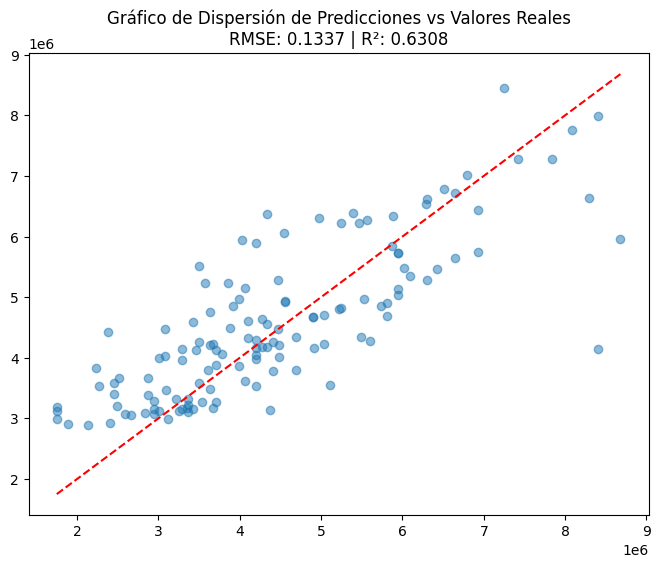

In [294]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
r2 = r2_score(y_test_original, y_pred)

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], color="red", linestyle="--")
plt.title(f"Gráfico de Dispersión de Predicciones vs Valores Reales\nRMSE: {rmse:.4f} | R²: {r2:.4f}")
plt.show()

##### Distribucion de errores

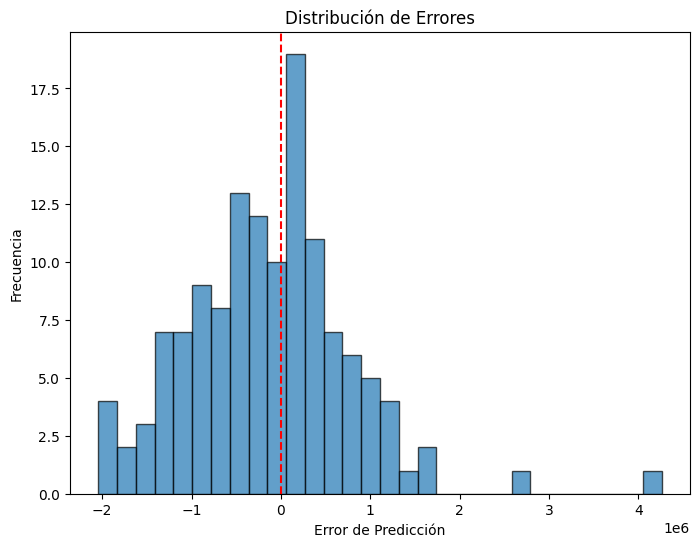

In [295]:
import matplotlib.pyplot as plt
import numpy as np

# Asegurar que ambos son arrays 1D
y_test_array = np.array(y_test_original).flatten()
y_pred_array = np.array(y_pred).flatten()

# Calcular errores
errors = y_test_array - y_pred_array  

plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')  # Línea en 0 para referencia
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores")
plt.show()


##### Tendencia de predicciones

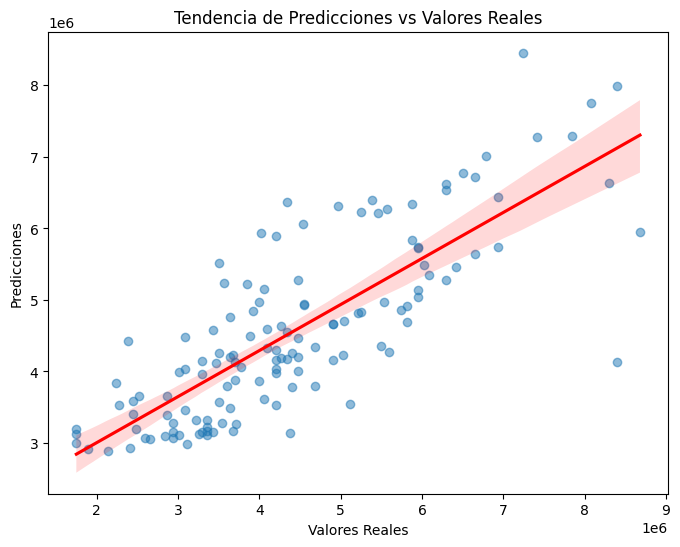

In [296]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test_original, y=y_pred, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Tendencia de Predicciones vs Valores Reales")
plt.show()


##### Errores relativos en las predicciones

In [297]:
!pip install openpyxl


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [298]:
import numpy as np
import pandas as pd

# Asegurar que y_test y y_pred sean arrays 1D
y_test_array = np.array(y_test_original).flatten()
y_pred_array = np.array(y_pred).flatten()

# Filtrar valores de y_test que sean cero para evitar división por cero
non_zero_mask = y_test_array != 0
y_test_filtered = y_test_array[non_zero_mask]
y_pred_filtered = y_pred_array[non_zero_mask]

# Calcular error relativo en porcentaje
relative_errors = np.abs((y_test_filtered - y_pred_filtered) / y_test_filtered) * 100  

# Filtrar casos con error > 10%
error_threshold = 10
high_error_cases = np.where(relative_errors > error_threshold)[0]  # Índices de predicciones con alto error

# Mostrar los casos con alto error
df_errors_altos = pd.DataFrame({
    "Real": y_test_filtered[high_error_cases],
    "Predicción": y_pred_filtered[high_error_cases],
    "Error Relativo (%)": relative_errors[high_error_cases]
})
# Mostrar todos los datos con sus errores relativos
df_errors = pd.DataFrame({
    "Real": y_test_filtered,
    "Predicción": y_pred_filtered,
    "Error Relativo (%)": relative_errors
})

# Exportar a archivos excel y csv para visualizacion facil y completa de los datos
df_errors_altos.sort_values(by=["Error Relativo (%)"], ascending=False).to_csv("errores_altos.csv", index=False)
df_errors_altos.sort_values(by=["Error Relativo (%)"], ascending=False).to_excel("errores_altos.xlsx")
df_errors.sort_values(by=["Error Relativo (%)"], ascending=False).to_csv("errores.csv", index=False)
df_errors.sort_values(by=["Error Relativo (%)"], ascending=False).to_excel("errores.xlsx")

print(df_errors.head(5))
print(f'Error relativo maximo: {df_errors["Error Relativo (%)"].max()}')

        Real  Predicción  Error Relativo (%)
0  4690000.0  3793510.50           19.114915
1  8080940.0  7754173.00            4.043676
2  4543000.0  6056867.50           33.323079
3  4060000.0  3612686.50           11.017574
4  3010000.0  3115930.25            3.519277
Error relativo maximo: 85.89930672268908


## Deployment del modelo

### Exportacion del modelo de escalado

Necesitamos el escalador original del precio para poder desescalar correctamente al hacer la prediccion en la api

In [299]:
import joblib
joblib.dump(scaler_price, "scaler_price.pkl")

['scaler_price.pkl']

### Exportacion del modelo de prediccion en varios formatos

#### En formato `.h5`

In [300]:
model_price.save("modelo_precio.h5")

#### En formato `.keras`

In [301]:
model_price.save("modelo_precio.keras")